# ML 0

In [142]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import random

%matplotlib inline

In [5]:
df = pd.read_csv('data/ml_01_data.csv')

In [6]:
df.head()

,Year,Name,Number of visitors (all days combined)
0,1993,Diáksziget '93,43000
1,1994,Diáksziget '94 - Eurowoodstock,143000
2,1995,Diáksziget '95,173000
3,1996,Pepsi Sziget 1996,206000
4,1997,Pepsi Sziget 1997,260000


In [9]:
df.columns = ['y','a','n']

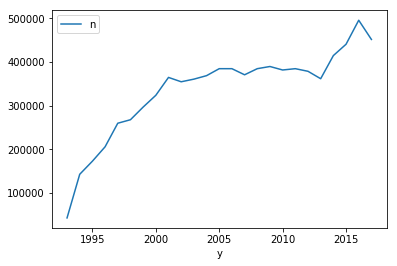

In [22]:
df.plot(x='y',y='n');

In [26]:
regr = linear_model.LinearRegression()

In [36]:
X = pd.DataFrame(df['y'])

In [34]:
Y = pd.Series(df['n'])

In [37]:
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
Xpred = pd.DataFrame(pd.Series(range(2018,2026)))

In [45]:
Ypred = regr.predict(Xpred)

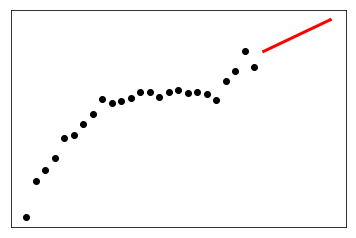

In [46]:
plt.scatter(X, Y,  color='black')
plt.plot(Xpred, Ypred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [47]:
regr.score(X,Y)

0.7674137009408774

76% variance predicted

In [53]:
ridge = linear_model.Ridge()
ridge.fit(X,Y)
Ypred_ridge = ridge.predict(Xpred)

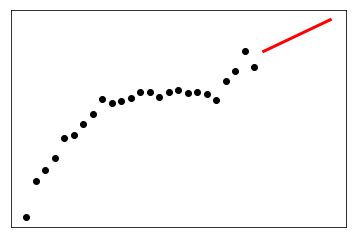

In [54]:
plt.scatter(X, Y,  color='black')
plt.plot(Xpred, Ypred_ridge, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Ridge regression

In [56]:
train, test = train_test_split(df, test_size=0.2)

In [68]:
Xtrain = pd.DataFrame(train.loc[:,'y'])

In [77]:
Ytrain = train['n']

In [72]:
Xtest = pd.DataFrame(test.loc[:,'y'])

In [103]:
Y_test = test['n'].values

In [70]:
ridge = linear_model.Ridge()
ridge.fit(Xtrain,Ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
Ypred_train = ridge.predict(Xtrain)

In [97]:
error=0
for i in range(len(Ytrain)):
    error+= abs(Ytrain.values[i] - Ypred_train[i]) / Ytrain.values[i]

train_error_ridge=error/len(Ytrain)*100

print("Train error = "'{}'.format(train_error_ridge)+" percent in Ridge Regression")

Train error = 11.032592300119797 percent in Ridge Regression


In [105]:
Ypred_test=ridge.predict(Xtest)
y_Predict=list(Ypred_test)

error=0
for i in range(len(Y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Test error = 25.443987000647876 percent in Ridge Regression


In [106]:
Xnew = pd.DataFrame(pd.Series(range(2018,2026)))

In [107]:
Ypred_new = ridge.predict(Xnew)

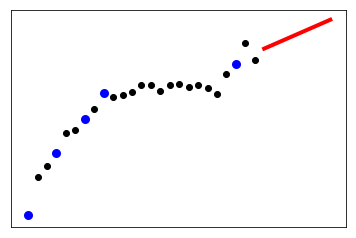

In [110]:
plt.scatter(Xtrain, Ytrain,  color='black')
plt.scatter(Xtest, Y_test, color='blue', linewidth=3)
plt.plot(Xnew, Ypred_new, color = 'red' , linewidth=4)

plt.xticks(())
plt.yticks(())

plt.show()

# O0

In [113]:
casvp = pd.read_csv('data/ot_02_data.csv', sep=';')

In [114]:
casvp

,Année de notification,Intitulé exhaustif du marché public,Nature du marché public,Date de signature,Titulaire,Code postal,Montant minimum H.T.,Montant maximum H.T. ou Montant global et fofaitaire HT,Filename
0,2016,"Blanchissage du linge des résidences-services,...",Services,2016-08-10,ESAT Les Ateliers de Jemmapes,75012,12000.00,200000.00,Open Data 2016
1,2016,"Fourniture, mise en place et exploitation d'un...",Services,2016-02-15,EDENRED,92240,240000.00,480000.00,Open Data 2016
2,2016,Fourniture de vêtements professionnels à desti...,Fournitures,2016-04-05,Robur,69140,15000.00,40000.00,Open Data 2016
3,2016,Fourniture de petit matériel de plomberie et d...,Fournitures,2016-08-05,CHAPADAUX SAS,93001,400000.00,1800000.00,Open Data 2016
4,2016,Marché à bons de commande pour la réalisation ...,Services,2016-07-01,Techniques TOPO,75011,160000.00,960000.00,Open Data 2016
5,2016,Maîtrise d'œuvre pour la modernisation d'ascen...,Services,2016-09-27,ALTEM Conseil,13007,NaN,22620.00,Open Data 2016
6,2016,"Fourniture de matériaux bois, composites et de...",Fournitures,2016-05-11,NORPANO,92230,80000.00,800000.00,Open Data 2016
7,2016,Petites fournitures industrielles pour les éta...,Fournitures,2016-05-04,AU FORUM DU BATIMENT,75015,144000.00,432000.00,Open Data 2016
8,2016,Organisation de prestations d'animations dansa...,Services,2016-05-11,A PLUS PROD,34200,15200.00,61000.00,Open Data 2016
9,2016,Fourniture de produits d'hygiène corporelle et...,Fournitures,2016-11-07,CEE,91070,400000.00,1000000.00,Open Data 2016


In [115]:
casvp.columns = ['year','obj','nature','date','name','zipcode','min','amount','filename']

Amount spent each year

In [119]:
casvp.groupby(by='year').amount.sum()

year
2013    5.167748e+07
2014    4.324175e+07
2015    3.624100e+07
2016    5.062224e+07
2017    2.143991e+08
Name: amount, dtype: float64

In [132]:
casvp['month'] = pd.to_datetime(casvp.date).map(lambda x: x.month)

In [136]:
casvp.groupby('month').amount.sum()

month
1.0     10151408.11
2.0     14039014.54
3.0     13902235.04
4.0     32449406.61
5.0     20064160.85
6.0     16415741.45
7.0     44910479.17
8.0     11893845.20
9.0      3064374.62
10.0    71325983.06
11.0    96715601.41
12.0    61249361.11
Name: amount, dtype: float64

Month 11 (Nov) was the one with the greatest amount spent

In [139]:
casvp['wd'] = pd.to_datetime(casvp.date).map(lambda x: x.weekday())

In [141]:
casvp.groupby('wd').amount.count()

wd
0.0    113
1.0    123
2.0     69
3.0     83
4.0     85
5.0      1
6.0      6
Name: amount, dtype: int64

On monday (weekday=0) are signed more contracts usually

# P0

In [185]:
def step():
    new = random.randint(1,4)
    dx, dy = 0, 0
    if new == 1:
        dx += 1
    elif new == 2:
        dy += 1
    elif new ==3 :
        dx += -1
    else :
        dy += -1
    return dx, dy

In [188]:
def RW(n):
    steps = []
    x,y = 0,0
    walkx,walky = [x],[y]
    for i in range(n):
        dx, dy = step()
        x += dx
        y += dy
        walkx.append(x)
        walky.append(y)
    return [walkx,walky]

[(0, 0), (-1, 0), (-1, 1), (-1, 2), (-1, 3), (-1, 2), (-1, 3), (-1, 4), (0, 4), (-1, 4), (-2, 4), (-2, 5), (-2, 6), (-2, 7), (-3, 7), (-2, 7), (-2, 8), (-2, 9), (-2, 8), (-1, 8), (-1, 9), (-1, 8), (-1, 9), (-2, 9), (-2, 10), (-3, 10), (-2, 10), (-3, 10), (-3, 9), (-3, 8), (-2, 8), (-2, 7), (-3, 7), (-3, 6), (-3, 7), (-3, 8), (-3, 7), (-3, 6), (-3, 7), (-2, 7), (-1, 7), (0, 7), (-1, 7), (-1, 8), (-1, 7), (0, 7), (0, 6), (-1, 6), (-2, 6), (-3, 6), (-3, 5)]


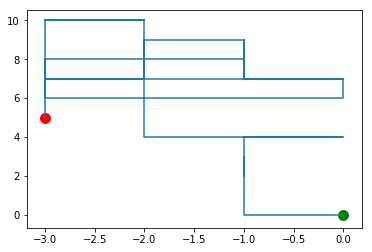

In [189]:
walk = RW(50)
print([(a,b) for (a,b) in zip(walk[0],walk[1])])
plt.plot(walk[0],walk[1], label= 'Random walk')
plt.scatter(walk[0][0], walk[1][0], color='green', linewidth=5)
plt.scatter(walk[0][-1], walk[1][-1], color='red', linewidth=5)
#plt.axis([-10,10,-10,10])
plt.show()

In [192]:
def markRW(n, xlimits, ylimits):
    steps = []
    x,y = 0,0
    walkx,walky = [x],[y]
    stopping_time = 0
    bounds_reached = False
    exit_point = None
    for i in range(n):
        dx, dy = step()
        x += dx
        y += dy
        if (x in xlimits or y in ylimits) and not bounds_reached:
            stopping_time = i
            exit_point = (x,y)
            bounds_reached = True
        walkx.append(x)
        walky.append(y)
    return [walkx,walky], stopping_time, exit_point

In [195]:
walk, stopping_time, exit_point = markRW(2000, [-10,10], [-10,10])

stopping time was: 197


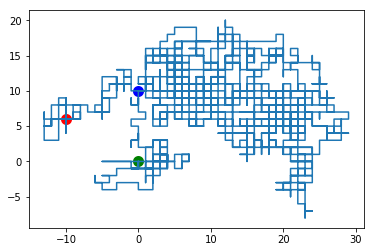

In [197]:
print("stopping time was: {}".format(stopping_time))
plt.plot(walk[0],walk[1], label= 'Random walk')
plt.scatter(walk[0][0], walk[1][0], color='green', linewidth=5)
plt.scatter(walk[0][-1], walk[1][-1], color='red', linewidth=5)
plt.scatter(exit_point[0], exit_point[1], color='blue', linewidth=5)
#plt.axis([-10,10,-10,10])
plt.show()

In [214]:
def hitRW(hitpoints):
    steps = []
    x,y = 0,0
    walkx,walky = [x],[y]
    bounds_reached = False
    exit_point = None
    max_time = 10**6
    for i in range(max_time):
        dx, dy = step()
        x += dx
        y += dy
        if (x,y) in hitpoints and not bounds_reached:
            exit_point = (x,y)
            bounds_reached = True
            break
    return i, exit_point

In [217]:
path_length, exit_point = hitRW([(11,11),(11,12),(11,13),
                                       (12,11)        ,(12,13),
                                       (13,11),(13,12),(13,13)])

In [218]:
path_length

1904

In [219]:
exit_point

(12, 11)

In [223]:
L = [0]*100
for i in range(100):
    path_length, exit_point = hitRW([(11,11),(11,12),(11,13),
                                   (12,11)        ,(12,13),
                                   (13,11),(13,12),(13,13)])
    L[i] = path_length

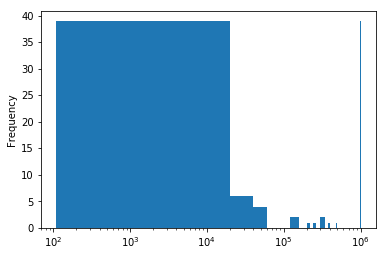

In [230]:
pd.Series(L).plot.hist(bins=50, logx=True);

# TS0

In [238]:
eq = pd.read_csv('data/ts_01_data.csv')

In [241]:
eq.columns=['year','n']

In [242]:
eq = eq[:-1]

In [243]:
eq

,year,n
0,1900,13.0
1,1901,14.0
2,1902,8.0
3,1903,10.0
4,1904,16.0
5,1905,26.0
6,1906,32.0
7,1907,27.0
8,1908,18.0
9,1909,32.0


In [252]:
N = eq.shape[0]

In [272]:
year_sum = [None]*(N-10)
for i in range(0,N-10):
    year_sum[i] = ( eq[i:(i+1)].year.iloc[0], eq[i:(i+10)].n.sum() )

In [275]:
sum_in_decades = pd.DataFrame(year_sum)

In [277]:
sum_in_decades.columns = ['decade_starting_year','sum_eq']

In [280]:
sum_in_decades.loc[sum_in_decades['sum_eq'].idxmax()]

decade_starting_year    1941
sum_eq                   314
Name: 41, dtype: object

From 1941 to 1951 there have been the most earthquakes

In [291]:
print("average number of earthquakes from 1952 to 1965: {}".format(eq.loc[eq.year.between('1952','1965'),'n'].mean()) )

average number of earthquakes from 1952 to 1965: 18.642857142857142


In [302]:
d = dict()
for idx, row in eq.iterrows():
    for jdx, row2 in eq.iterrows():
        if row['n'] == row2['n']:
            if row['n'] not in d:
                d[row['n']] = set([row['year'], row2['year']])
            else:
                d[row['n']].add(row['year'])
                d[row['n']].add(row2['year'])

In [303]:
d

{13.0: {'1900', '1930', '1932', '1990'},
 14.0: {'1901', '1919', '1922', '1933', '1981'},
 8.0: {'1902', '1920', '1984', '1988'},
 10.0: {'1903', '1958', '1982', '1991'},
 16.0: {'1904', '1967', '1973', '1977', '1993', '1998'},
 26.0: {'1905', '1931', '1938', '1947'},
 32.0: {'1906', '1909'},
 27.0: {'1907', '1942', '1945', '1969'},
 18.0: {'1908', '1915', '1924', '1961', '1978', '1980'},
 36.0: {'1910', '1949'},
 24.0: {'1911', '1935', '1941'},
 22.0: {'1912',
  '1914',
  '1928',
  '1934',
  '1937',
  '1953',
  '1960',
  '1965',
  '1996'},
 23.0: {'1913', '1923', '1940', '1971', '1992'},
 25.0: {'1916', '1976', '1995'},
 21.0: {'1917', '1918', '1936', '1939', '1951', '1974', '1975'},
 11.0: {'1921', '1987'},
 17.0: {'1925', '1952', '1954'},
 19.0: {'1926', '1929', '1955', '1966'},
 20.0: {'1927', '1963', '1972', '1997'},
 41.0: {'1943'},
 31.0: {'1944'},
 35.0: {'1946'},
 28.0: {'1948'},
 39.0: {'1950'},
 15.0: {'1956', '1959', '1962', '1964', '1979', '1983', '1985', '1994'},
 34.0: {

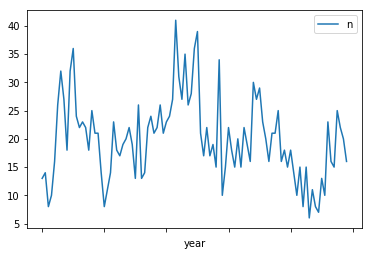

In [304]:
eq.plot(x='year',y='n');

In [306]:
from statsmodels.tsa.seasonal import seasonal_decompose

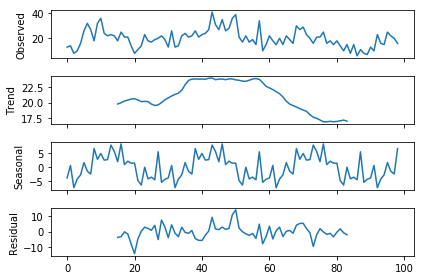

In [321]:
result = seasonal_decompose(eq.n, model='additive', freq=30).plot()